Join the data from Part 1 with the data from Part 2 to create a new dataframe.

In [1]:
import pandas as pd

# Opening both CSV's file as a DataFrame
df1 = pd.read_csv('FourSquarePOI.csv')
df2 = pd.read_csv('YelpPOI.csv')

# Joining the data (vertically)
joined_df = pd.concat([df1, df2])

joined_df

,station,usage,total_bikes,poi_name,poi_distance,poi_address
0,Hollywood North Beach,0.636364,11,Hollywood North Beach Park,9.000000,"3601 N Ocean Dr, Hollywood, FL 33019"
1,Hollywood North Beach,0.636364,11,Food King,414.000000,"3111 N Surf Rd, Hollywood, FL 33019"
2,Hollywood North Beach,0.636364,11,Oceans 13 Sports Bar & Grill,432.000000,"3111 N Surf Rd, Hollywood, FL 33019"
3,Hollywood North Beach,0.636364,11,Anne Kolb Nature Center,614.000000,"751 Sheridan St, Hollywood, FL 33019"
4,Hollywood North Beach,0.636364,11,Marine Environmental Education Center at the C...,696.000000,"4414 N Surf Rd, Hollywood, FL 33019"
...,...,...,...,...,...,...
372,Willingham Park,0.857143,14,Willingham Park,78.929008,2100 N Atlantic Blvd
373,Willingham Park,0.857143,14,Lu Deaner Park,217.537675,2125 NE 33rd Ave
374,Willingham Park,0.857143,14,Loggerhead Park,741.500463,3698 NE 27th St
375,Willingham Park,0.857143,14,Moreth House,508.069849,3000 NE 19th St


In [2]:
# I'm saving the dataframe to CSV for the next section
joined_df.to_csv('joined.csv', index=False)

### Checking Data Types

In [3]:
joined_df.dtypes

station          object
usage           float64
total_bikes       int64
poi_name         object
poi_distance    float64
poi_address      object
dtype: object

In [ ]:
### We're not going to drop any columns because that type of data sorting, and renaming columns happened at an earlier stage

### Checking for null values

In [4]:
print(joined_df.isnull().sum())

station         0
usage           0
total_bikes     0
poi_name        0
poi_distance    0
poi_address     0
dtype: int64


In [ ]:
### No null values in any of the relevant fields

### Outlier detection

In [5]:
### I'd like to understand the outliers particular in the "Usage" metric, which is a calculated metric equivalent to
### bikes currently being used / total bikes available. 

In [5]:
import seaborn as sns                       #visualisation
import matplotlib.pyplot as plt             #visualisation
%matplotlib inline     
sns.set(color_codes=True)

<Axes: xlabel='usage'>

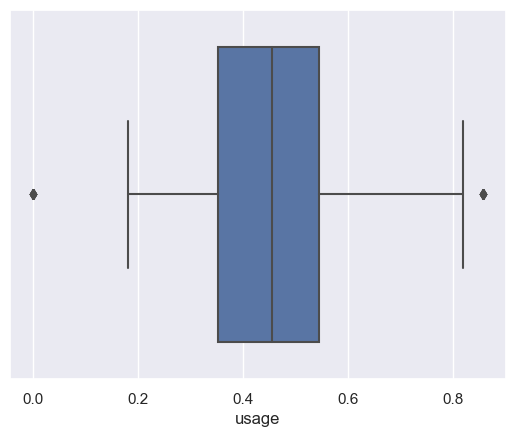

In [6]:
sns.boxplot(x=joined_df['usage'])

### The boxplot indicates a large interquartile range for usage, generally just under 0.5, but ranging as high as 0.97 (outlier) and as low as 0, which is an outlier.  Lets take a look at POI distance away from the station and see the boxplot

 ### Lets take a look at POI distance away from the station and see the boxplot

<Axes: xlabel='poi_distance'>

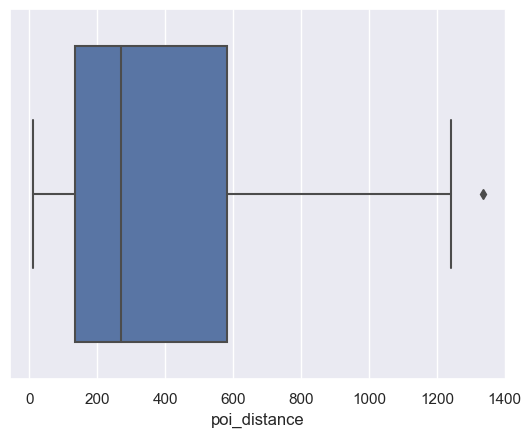

In [7]:
sns.boxplot(x=joined_df['poi_distance'])

In [ ]:
### Once again this is very interesting - with the median being about 300 metres, but distances going up above
### 1,200 metres (which may be erroneous) and as low as close to zero.  

Provide a visualization that you used as part of your EDA process. Explain the initial pattern or relationship you discoved through this visualization. 

In [ ]:
### In addition to the boxplots above, let's take a look at a scatterplot to see whether we can see any corellation between two
### variables.  In this particular case I want to focus on usage vs distance from points of interest.

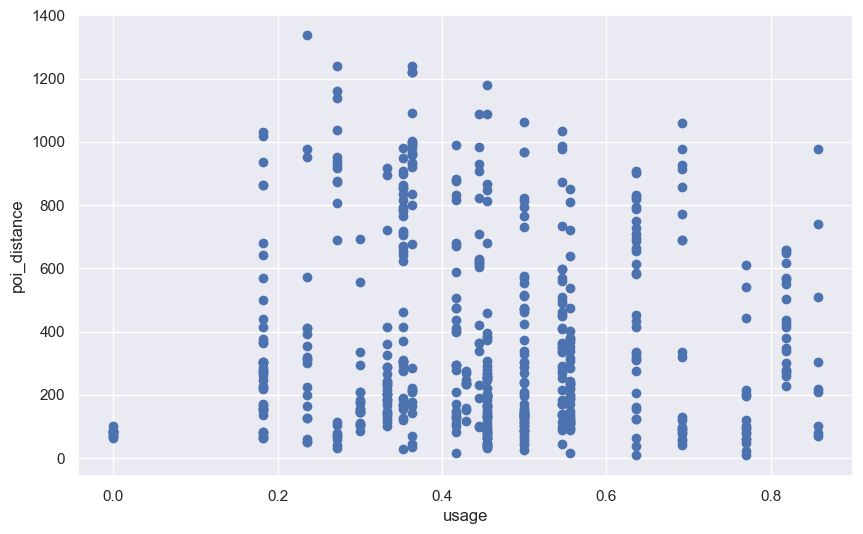

In [8]:
fig, ax = plt.subplots(figsize=(10,6))
ax.scatter(joined_df['usage'], joined_df['poi_distance'])
ax.set_xlabel('usage')
ax.set_ylabel('poi_distance')
plt.show()

### Very interesting! there does seem to be a relationship between usage and distance away from points of interest since there appears to be less usage (and dot density) the further away stations are from points of interest.  This tends to make sense,as there very likely just more people around the points of interest in this tourist oriented town

In [23]:
### Okay, let's take a look at a scatterplot of the total number of bikes at a station, versus distance away from points
### of interest.

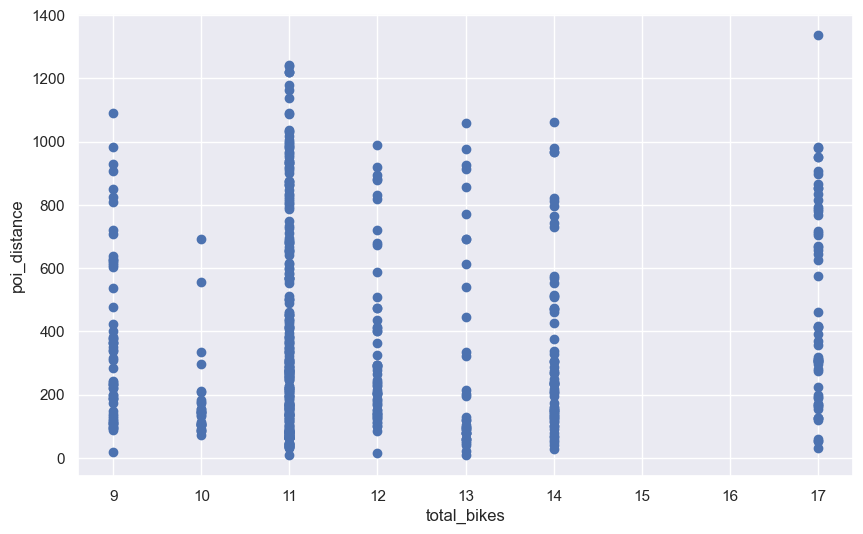

In [9]:
fig, ax = plt.subplots(figsize=(10,6))
ax.scatter(joined_df['total_bikes'], joined_df['poi_distance'])
ax.set_xlabel('total_bikes')
ax.set_ylabel('poi_distance')
plt.show()

### There doesn't seem to be a discernable pattern here, other than having a slight preference for 11 total bikes per station

### Also I still think the map presented below serves to show geographic concentration of bike stations along the beach, which is also where tourists tend to congregate

In [16]:
import folium
import pandas as pd
from folium import Marker

latitude = 26.12231
longitude = -80.14338

map_Fort_Lauderdale = folium.Map(location=[latitude,longitude], zoom_start=12)

#Importing stations dataframe
stations_df = pd.read_csv('stations.csv')


#Creating Map
for index, row in stations_df.iterrows():
    marker = Marker(
        location=[row['latitude'], row['longitude']],
        tooltip=row['name']
    )
    marker.add_to(map_Fort_Lauderdale)
    
map_Fort_Lauderdale
    


### AS YOU CAN SEE ABOVE, THE MAJORITY OF THE BIKE STATIONS ARE LOCATED ALONG THE BEACH, WHICH MAKES SENSE AS TOURISTS LIKELY REQUIRE BICYCLE MOBILITY BETWEEN TOURIST HOT SPOTS

# Database

Put all your results in an SQLite3 database (remember, SQLite stores its databases as files in your local machine - make sure to create your database in your project's data/ directory!)

In [10]:
import pandas as pd
import sqlite3

conn = sqlite3.connect('points_of_interest.db')
table_name = 'poi'
joined_df.to_sql(table_name, conn, index=False, if_exists='replace')
conn.close()

Look at the data before and after the join to validate your data.

In [11]:
conn = sqlite3.connect("points_of_interest.db")
cursor = conn.cursor()
cursor.execute("SELECT * FROM poi")

# Fetch all rows
rows = cursor.fetchall()
for row in rows:
    print(row)
    
cursor.close()
conn.close()

('Hollywood North Beach', 0.6363636363636364, 11, 'Hollywood North Beach Park', 9.0, '3601 N Ocean Dr, Hollywood, FL 33019')
('Hollywood North Beach', 0.6363636363636364, 11, 'Food King', 414.0, '3111 N Surf Rd, Hollywood, FL 33019')
('Hollywood North Beach', 0.6363636363636364, 11, 'Oceans 13 Sports Bar & Grill', 432.0, '3111 N Surf Rd, Hollywood, FL 33019')
('Hollywood North Beach', 0.6363636363636364, 11, 'Anne Kolb Nature Center', 614.0, '751 Sheridan St, Hollywood, FL 33019')
('Hollywood North Beach', 0.6363636363636364, 11, 'Marine Environmental Education Center at the Carpenter House', 696.0, '4414 N Surf Rd, Hollywood, FL 33019')
('Hollywood North Beach', 0.6363636363636364, 11, 'Latitudes Restaurant', 787.0, '2501 N Ocean Dr (at Hollywood Beach Marriott), Hollywood, FL 33019')
('Earl Lifshey 3.0', 0.4166666666666667, 12, 'Marcello Sport', 15.0, '3201 N Ocean Blvd, Fort Lauderdale, FL 33308')
('Earl Lifshey 3.0', 0.4166666666666667, 12, 'Walgreens', 84.0, '3101 N Ocean Blvd, Fo

In [25]:
### I'm not entirely sure what the question is asking here with respect to validation - the data matches what is in my joined_df
### so I consider it validated. Beyond that I would have to explore the database more, which is likely beyond the scope of the
### question.